# Bushfire Impact Water Quality

**Data Source:**
+ https://datasets.seed.nsw.gov.au/dataset/bushfire-impact-water-quality

The above source has data available from Jan 2020 onwards, so in this procedure data lakes data for Jan 2020 was taken only, to determine the increase in water temp as a result of bushfire.

The following data is taken form the following **.csv** files and then was concatenated using tableau, and grouped by date using python (as there were multiple daily records observed).

The datasets are;
+ Lake Conjola Water Quality Time Series Jan - Feb, https://datasets.seed.nsw.gov.au/dataset/bushfire-impact-water-quality/resource/bfe17760-f8f2-442e-a546-3c0926f2bbf0
+ Meroo Lake Water Quality Time Series Jan - Feb, https://datasets.seed.nsw.gov.au/dataset/bushfire-impact-water-quality/resource/a16f8fcb-ff60-4db9-b7bb-860927859200
+ Termeil Lake Water Quality Time Series Jan - Feb,
https://datasets.seed.nsw.gov.au/dataset/bushfire-impact-water-quality/resource/8a888fbe-1948-48bb-bfee-f057bc965f91
+ Tuross River Water Quality Time Series Jan - Feb,
https://datasets.seed.nsw.gov.au/dataset/bushfire-impact-water-quality/resource/e3c0b671-9b67-4808-8126-adc4411d7393

In [35]:
import os

In [36]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #plotting
import seaborn as sns #for beatiful visualization

In [37]:
os.getcwd()

'C:\\Users\\61423\\OneDrive\\Desktop\\SEM 3\\DVN\\AT3\\Python'

In [38]:
lakes= pd.read_csv(r'C:\\Users\\61423\\OneDrive\\Desktop\\SEM 3\\DVN\\AT3\\nsw stats\\water quality\\combined_lakes.csv')

In [39]:
lakes.head()

,Date,Conjola_temp,Termeil_temp,Tuross_temp,Meroo_temp
0,2020-01-21,25.53,19.88,23.38,19.78
1,2020-01-21,25.52,20.20,23.26,19.78
2,2020-01-21,25.46,20.42,23.17,19.86
3,2020-01-21,25.48,20.52,23.06,20.04
4,2020-01-21,25.35,20.64,22.94,20.20


In [40]:
lakes['Date'] = pd.to_datetime(lakes['Date'])


In [41]:
lakes = lakes.resample('d', on='Date').mean().dropna(how='all')


In [42]:
print(lakes)

            Conjola_temp  Termeil_temp  Tuross_temp  Meroo_temp
Date                                                           
2020-01-21     25.265500     21.688000    22.523000   21.313000
2020-01-22     25.782083     21.900417    26.131562   23.250000
2020-01-23     25.799062     27.261042    28.220417   27.066250
2020-01-24     25.537396     26.149792    26.953542   25.785625
2020-01-25     26.010000     27.303125    27.166458   27.332500
2020-01-26     26.825312     29.377292    27.279792   29.785625
2020-01-27     26.995313     28.095000    27.255208   28.576250
2020-01-28     27.072604     27.400625    27.231563   27.451250
2020-01-29     27.121042     27.115833    27.330104   27.190625
2020-01-30     27.693021     27.766042    27.471875   27.920833
2020-01-31     28.193021     28.349375    27.893646   28.738125
2020-02-01     29.042500     29.727708    28.190417   29.986667
2020-02-02     28.884896     27.821042    28.101042   28.100417
2020-02-03     28.200729     26.092292  

In [44]:
# As date is in the index column we will rename the index column
#lakes.index.name= "Date"
# Converting the index into a column
#lakes=lakes.reset_index()


print("modified: ")
print(lakes)

modified: 
         Date  Conjola_temp  Termeil_temp  Tuross_temp  Meroo_temp
0  2020-01-21     25.265500     21.688000    22.523000   21.313000
1  2020-01-22     25.782083     21.900417    26.131562   23.250000
2  2020-01-23     25.799062     27.261042    28.220417   27.066250
3  2020-01-24     25.537396     26.149792    26.953542   25.785625
4  2020-01-25     26.010000     27.303125    27.166458   27.332500
5  2020-01-26     26.825312     29.377292    27.279792   29.785625
6  2020-01-27     26.995313     28.095000    27.255208   28.576250
7  2020-01-28     27.072604     27.400625    27.231563   27.451250
8  2020-01-29     27.121042     27.115833    27.330104   27.190625
9  2020-01-30     27.693021     27.766042    27.471875   27.920833
10 2020-01-31     28.193021     28.349375    27.893646   28.738125
11 2020-02-01     29.042500     29.727708    28.190417   29.986667
12 2020-02-02     28.884896     27.821042    28.101042   28.100417
13 2020-02-03     28.200729     26.092292    27.570

In [45]:
# save lakes into a csv
lakes.to_csv("lakes_temp.csv")

In [52]:
lakes_tidy= lakes.melt(id_vars=["Date"], 
                              var_name="Estuaries", 
                              value_name="water_temperature")
#print(lakes_tidy)
# https://cmdlinetips.com/2019/06/reshaping-dataframes-with-pandas-melt-and-wide_to_long/

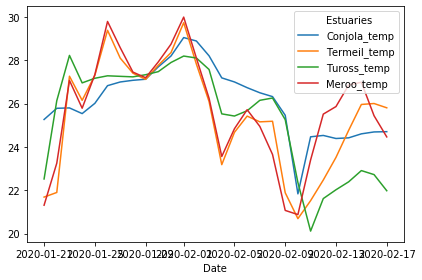

In [55]:


ax= sns.lineplot(x="Date", y="water_temperature", hue="Estuaries", data=lakes_tidy)

#ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right") # this rotates the labels at a 40degree

plt.xlabel("Date")
plt.ylabel('')
plt.title("")
plt.tight_layout()



# Visualization

In [57]:
from pandas import read_csv
from matplotlib import pyplot
NSW_lakes = read_csv('lakes_temp.csv', header=0, index_col=0, parse_dates=False, squeeze=True)


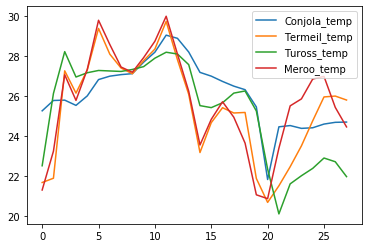

In [58]:
NSW_lakes.plot()
pyplot.show()

# https://machinelearningmastery.com/time-series-data-visualization-with-python/